In [38]:
import pprint
import cv2
from ultralytics import YOLO
from utils.yolo import parse_yolo_predictions, draw_bounding_boxes
from device import current_device
# from keras.models import load_model

In [39]:
import torch

climberYoloModel = YOLO("weights/climb_walk/climber.pt").to(torch.device(current_device))
print("Climber YOLO Loaded")
pretrainedYoloModel = YOLO("weights/yolo_v8/yolov8n.pt").to(torch.device(current_device))
print("Pretrained YOLO Loaded")

Climber YOLO Loaded
Pretrained YOLO Loaded


In [52]:
frame = cv2.imread("../samples/gg.png")
outputs = pretrainedYoloModel.predict(source=frame)
detections = parse_yolo_predictions(outputs)
byte_im_io = draw_bounding_boxes(frame, detections)
with open("output.jpeg", "wb") as f:
    f.write(byte_im_io.getbuffer())


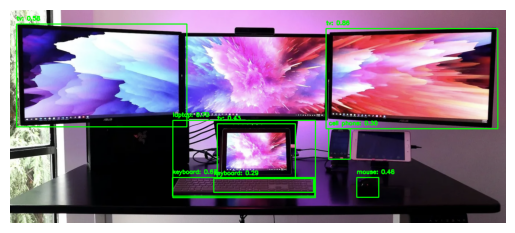

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def draw_boxes(frame, predictions):
    for prediction in predictions:
        bbox = prediction['bbox']
        confidence = prediction['confidence']
        label = prediction['label']

        # Convert normalized coordinates to pixel coordinates
        h, w, _ = frame.shape
        x, y, width, height = bbox
        x = int(x * w)
        y = int(y * h)
        width = int(width * w)
        height = int(height * h)
        x -= width // 2
        y -= height // 2

        # Draw bounding box on the frame
        color = (0, 255, 0)  # Green color
        thickness = 2
        cv2.rectangle(frame, (x, y), (x + width, y + height), color, thickness)

        # Display label and confidence
        label_text = f"{label}: {confidence:.2f}"
        cv2.putText(frame, label_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

    return frame

result_frame = draw_boxes(frame.copy(), detections)

cv2.imwrite("output2.jpeg", result_frame) 

# Display the result in the notebook
plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [2]:
frame = cv2.imread("../samples/climber2.jpg")
outputs = climberYoloModel.predict(source=frame)
detections = parse_yolo_predictions(outputs)
detections

NameError: name 'climberYoloModel' is not defined

In [46]:
outputs[0].names

{0: 'climber', 1: 'walker'}

In [54]:
outputs[0].keypoints.xyn.shape

torch.Size([4, 17, 2])

In [30]:
outputs[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[211.0000,  78.0000, 239.0000, 118.0000,   0.3894,   1.0000],
        [ 27.0000, 107.0000,  54.0000, 155.0000,   0.3645,   1.0000]])
cls: tensor([1., 1.])
conf: tensor([0.3894, 0.3645])
data: tensor([[211.0000,  78.0000, 239.0000, 118.0000,   0.3894,   1.0000],
        [ 27.0000, 107.0000,  54.0000, 155.0000,   0.3645,   1.0000]])
id: None
is_track: False
orig_shape: (183, 275)
shape: torch.Size([2, 6])
xywh: tensor([[225.0000,  98.0000,  28.0000,  40.0000],
        [ 40.5000, 131.0000,  27.0000,  48.0000]])
xywhn: tensor([[0.8182, 0.5355, 0.1018, 0.2186],
        [0.1473, 0.7158, 0.0982, 0.2623]])
xyxy: tensor([[211.,  78., 239., 118.],
        [ 27., 107.,  54., 155.]])
xyxyn: tensor([[0.7673, 0.4262, 0.8691, 0.6448],
        [0.0982, 0.5847, 0.1964, 0.8470]])

In [42]:
outputs[0].names

{0: 'Gun', 1: 'Knife'}

In [26]:
outputs[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([], size=(0, 6))
cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (159, 318)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))

In [27]:
outputs[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: None
data: tensor([], size=(1, 0, 51))
has_visible: False
orig_shape: (159, 318)
shape: torch.Size([1, 0, 51])
xy: tensor([], size=(1, 0, 2))
xyn: tensor([], size=(1, 0, 2))

In [46]:
outputs[0].boxes[0], outputs[0].boxes[1], outputs[0].boxes[1]

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


(ultralytics.engine.results.Boxes object with attributes:
 
 boxes: tensor([[  0.0000,  15.2731, 104.5066, 139.5477,   0.5677,   0.0000]])
 cls: tensor([0.])
 conf: tensor([0.5677])
 data: tensor([[  0.0000,  15.2731, 104.5066, 139.5477,   0.5677,   0.0000]])
 id: None
 is_track: False
 orig_shape: (225, 225)
 shape: torch.Size([1, 6])
 xywh: tensor([[ 52.2533,  77.4104, 104.5066, 124.2746]])
 xywhn: tensor([[0.2322, 0.3440, 0.4645, 0.5523]])
 xyxy: tensor([[  0.0000,  15.2731, 104.5066, 139.5477]])
 xyxyn: tensor([[0.0000, 0.0679, 0.4645, 0.6202]]),
 ultralytics.engine.results.Boxes object with attributes:
 
 boxes: tensor([[102.5732,  17.3269, 219.4575, 137.6605,   0.5125,   0.0000]])
 cls: tensor([0.])
 conf: tensor([0.5125])
 data: tensor([[102.5732,  17.3269, 219.4575, 137.6605,   0.5125,   0.0000]])
 id: None
 is_track: False
 orig_shape: (225, 225)
 shape: torch.Size([1, 6])
 xywh: tensor([[161.0153,  77.4937, 116.8842, 120.3336]])
 xywhn: tensor([[0.7156, 0.3444, 0.5195, 0.5348

In [56]:
outputs[0].boxes.cls

tensor([0., 0., 0., 0., 1.])

In [28]:
outputs[0].boxes.xywh.tolist()

[[500.55377197265625,
  179.87948608398438,
  164.24246215820312,
  165.65061950683594],
 [360.8485107421875, 146.62167358398438, 121.546875, 178.2393035888672],
 [702.9388427734375, 53.9835090637207, 133.1436767578125, 107.9670181274414],
 [153.8926544189453,
  124.35717010498047,
  128.75613403320312,
  199.0615997314453],
 [698.9496459960938, 208.50839233398438, 111.9210205078125, 144.3022918701172]]

In [68]:
outputs[0].boxes[0]

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[376.0414, 282.7526, 916.1423, 649.9327,   0.9333,   0.0000]])
cls: tensor([0.])
conf: tensor([0.9333])
data: tensor([[376.0414, 282.7526, 916.1423, 649.9327,   0.9333,   0.0000]])
id: None
is_track: False
orig_shape: (740, 1216)
shape: torch.Size([1, 6])
xywh: tensor([[646.0919, 466.3427, 540.1010, 367.1801]])
xywhn: tensor([[0.5313, 0.6302, 0.4442, 0.4962]])
xyxy: tensor([[376.0414, 282.7526, 916.1423, 649.9327]])
xyxyn: tensor([[0.3092, 0.3821, 0.7534, 0.8783]])

In [88]:

results = []
for i in range(len(outputs[0].boxes)):
    results.append({
        'confidence': outputs[0].boxes[i].conf[0].item(),
        'label': outputs[0].names[outputs[0].boxes[i].cls.item()],
        'bbox': outputs[0].boxes[i].xywhn[0].tolist(),
        'bbox_std': outputs[0].boxes[i].xywh[0].tolist(),
        'orig_shape': outputs[0].orig_shape
    })
pprint.pprint(results)

[{'bbox': [0.5313255190849304,
           0.630192756652832,
           0.444161981344223,
           0.49618929624557495],
  'bbox_std': [646.0918579101562,
               466.3426513671875,
               540.1009521484375,
               367.1800842285156],
  'confidence': 0.9333458542823792,
  'label': 'Gun',
  'orig_shape': (740, 1216)},
 {'bbox': [0.267814576625824,
           0.5433048009872437,
           0.09092368930578232,
           0.708624541759491],
  'bbox_std': [325.66253662109375,
               402.0455627441406,
               110.56320190429688,
               524.3821411132812],
  'confidence': 0.7023518085479736,
  'label': 'Gun',
  'orig_shape': (740, 1216)},
 {'bbox': [0.5150426626205444,
           0.24983258545398712,
           0.3836894631385803,
           0.28943443298339844],
  'bbox_std': [626.2918701171875,
               184.87611389160156,
               466.5663757324219,
               214.18148803710938],
  'confidence': 0.5849758982658386,
  'lab

In [100]:
# cap = cv2.VideoCapture('rtmp://localhost/mystream')
import time

NUM_FRAMES = 30  # Number of frames per video clip (must match the training configuration)
frame_buffer = []

garbage_last_time = 0
assault_last_time = 0
videoPath = 'samples/gun_video_ultra_short.mp4'
# videoPath = 'samples/gun_video_short.mp4'
results = weaponsYoloModel.predict(source=videoPath, save=True)
counter = 0

# cap = cv2.VideoCapture(videoPath)
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break
#     if counter % 50 == 0:
#         results = weaponsYoloModel.predict(source=frame, save=True)
#         # if list(results[0].boxes.cls).count(0) > 0:
#         #     img_with_boxes = results[0].plot()
#         #     cv2.imwrite(f'temp-results/weapons/weapon_f{counter}', img_with_boxes)
#     counter +=1
# cap.release()




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/245) /Users/omkar/projects/rajpol/Backend/models/samples/gun_video_ultra_short.mp4: 256x416 2 Knifes, 48.6ms
video 1/1 (2/245) /Users/omkar/projects/rajpol/Backend/models/samples/gun_video_ultra_short.mp4: 256x416 3 Knifes, 28.9ms
video 1/1 (3/245) /Users/omkar/projects/rajpol/Backend/models/samples/gun_video_ultra_short.mp4: 256x416 2 Knifes, 23.2ms
video 1/1 (4/245) /Users/omkar/projects/rajpol/Backend/models/samples/gun_video_ultra_shor

Fight model loaded
Optimised fight model for apple silicon
1/1 [==============================] - 1s 1s/step
Predicted Class: 1


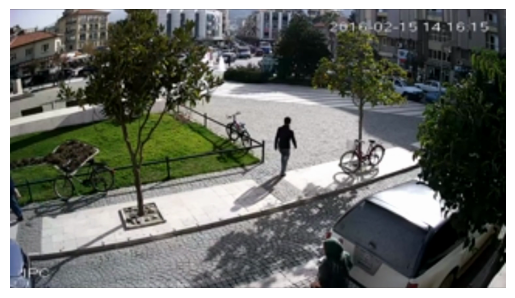

1/1 [==============================] - 1s 1s/step
Predicted Class: 0


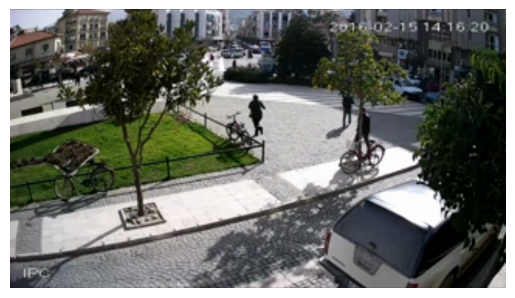

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


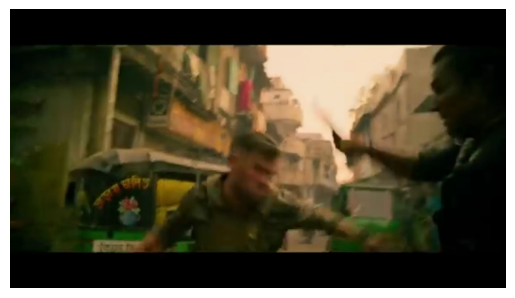

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


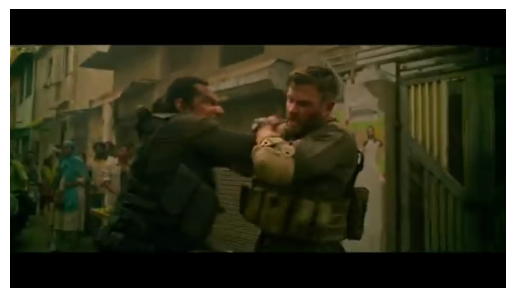

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


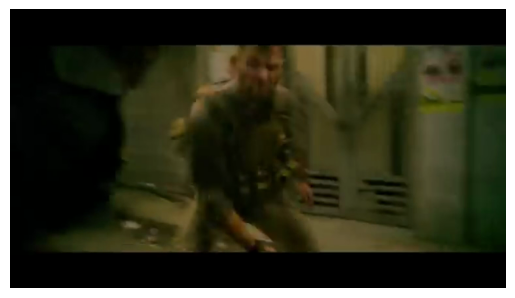

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


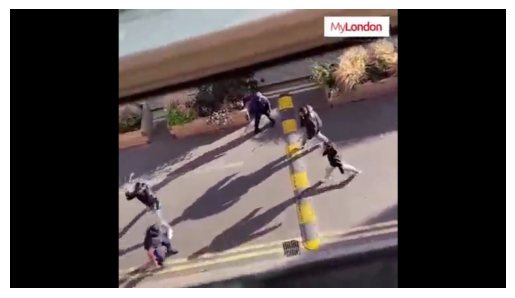

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


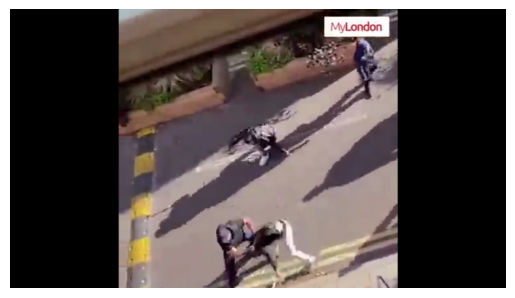

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


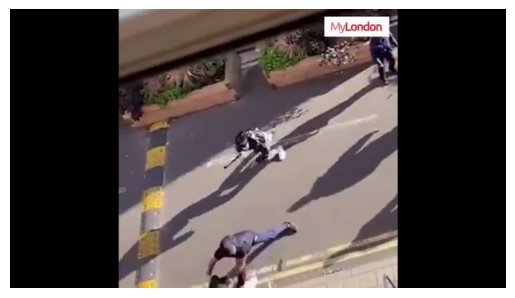

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


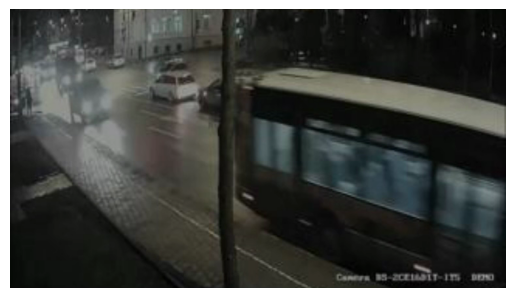

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


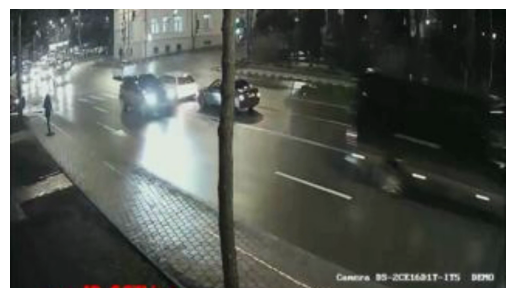

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


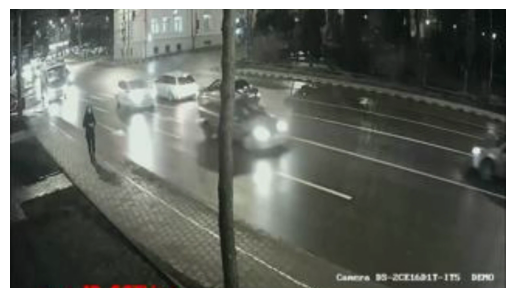

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


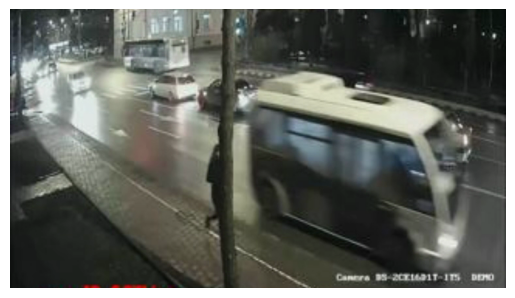

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


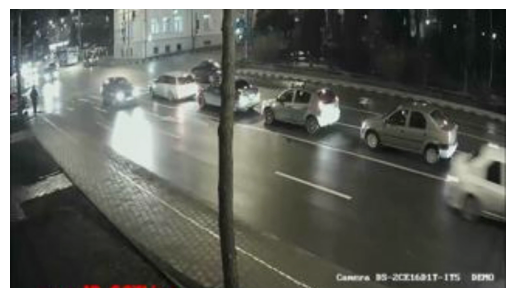

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


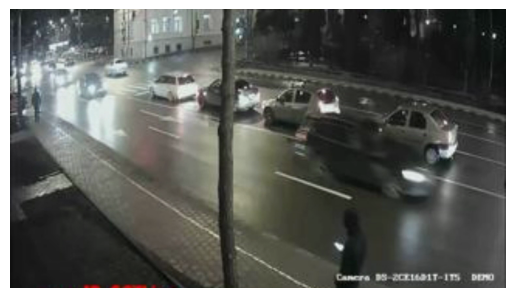

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


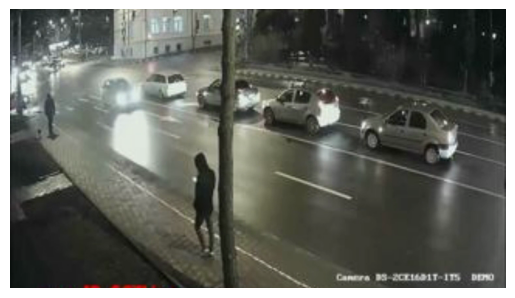

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


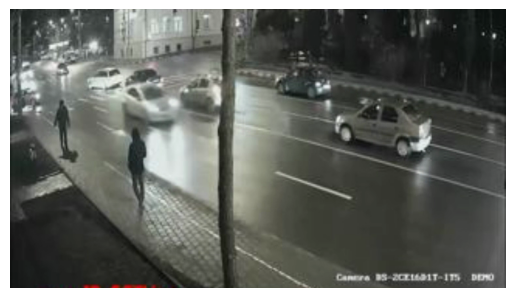

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


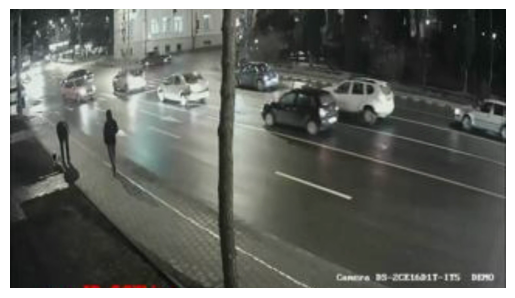

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


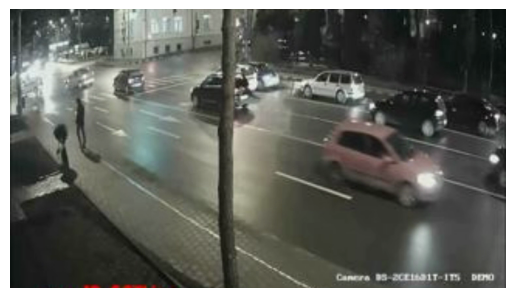

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


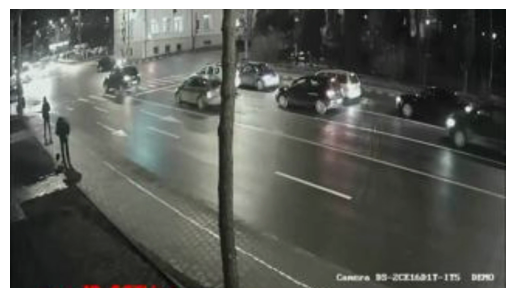

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


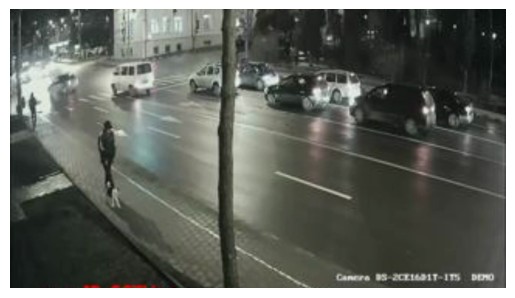

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


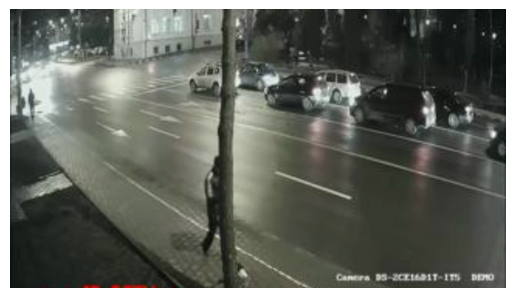

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


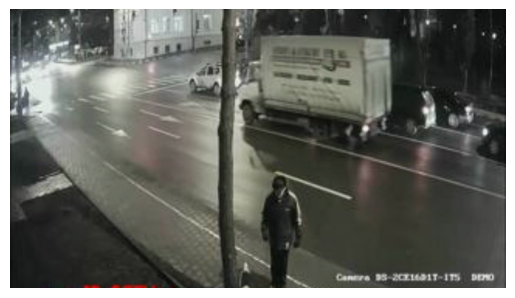

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


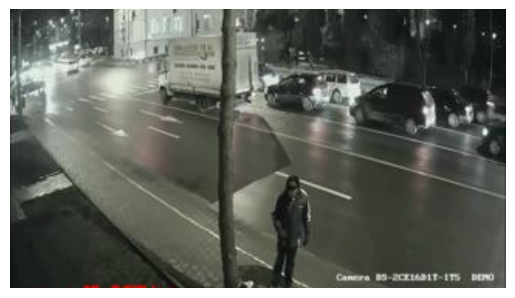

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


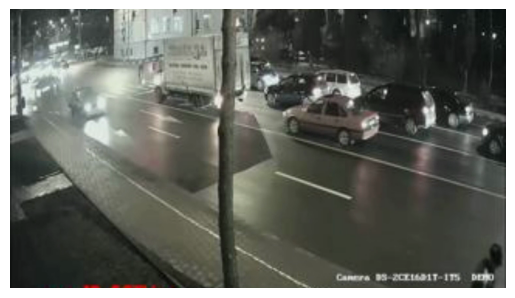

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


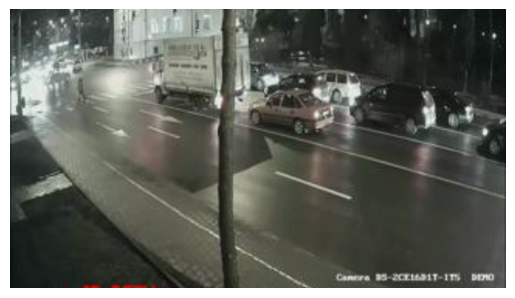

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


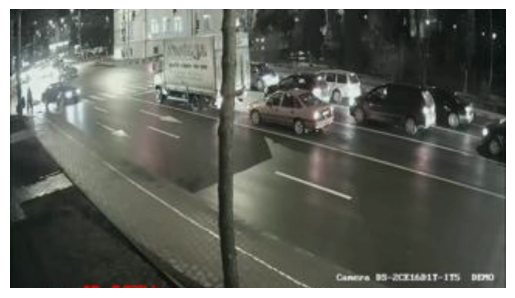

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


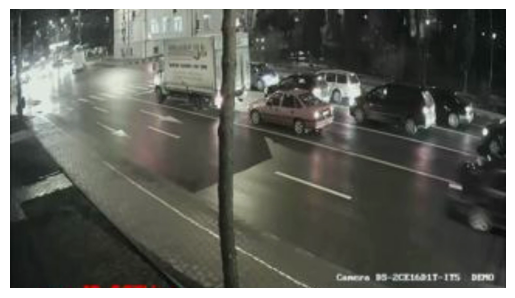

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


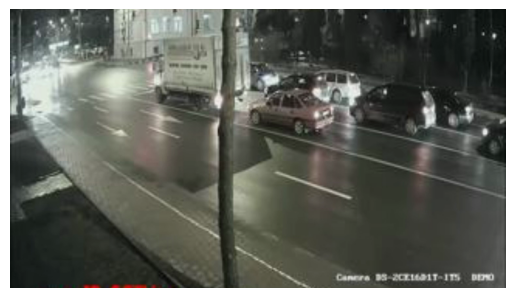

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


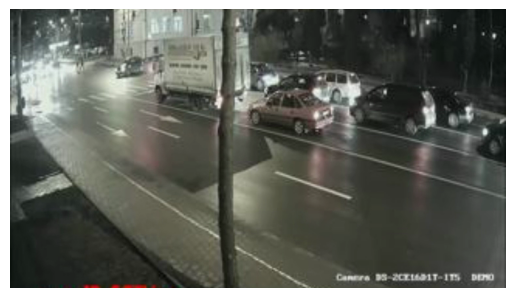

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


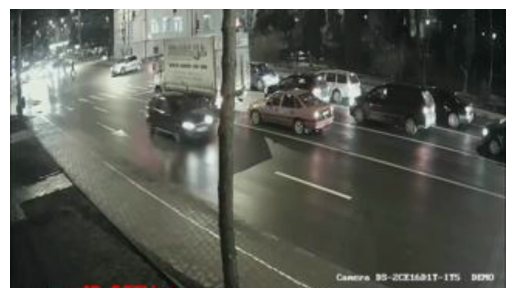

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


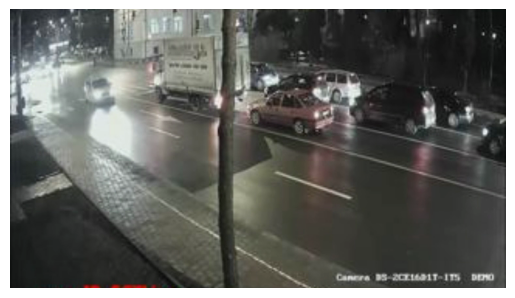

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


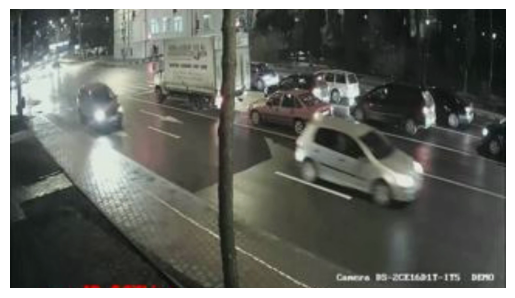

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


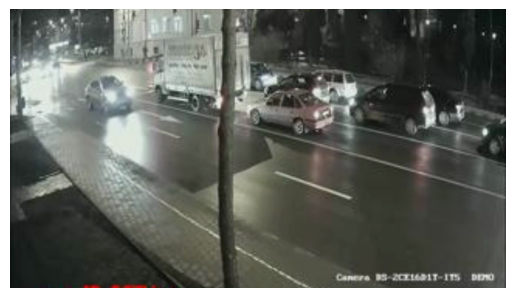

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


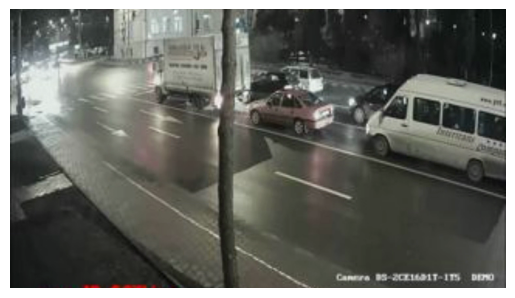

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


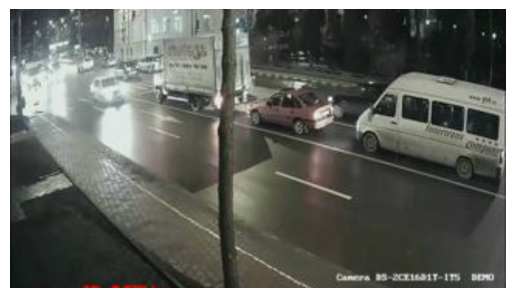

1/1 [==============================] - 1s 1s/step
Predicted Class: 1


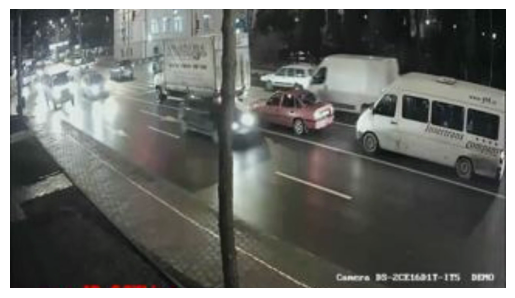

KeyboardInterrupt: 

In [74]:
import time
import cv2
import platform
from keras.models import load_model
from keras.optimizers import legacy
from matplotlib import pyplot as plt

fightModel = load_model("weights/fights/fights2vgg2cat2.keras")
print("Fight model loaded")

if platform.system() == "Darwin" and platform.processor() == "arm":
    # You can adjust the learning rate if needed
    legacy_adam = legacy.Adam(learning_rate=0.001)
    fightModel.compile(optimizer=legacy_adam,
                       loss='binary_crossentropy', metrics=['accuracy'])
    print("Optimised fight model for apple silicon")


FIGHT_FRAME_WIDTH = 128
FIGHT_FRAME_HEIGHT = 128
# Number of frames per video clip (must match the training configuration)
FIGHT_NUM_FRAMES = 30
frame_buffer = []

assault_last_time = 0
cap = cv2.VideoCapture('../samples/public_cam.mp4')
counter = 0
while True:

    ret, frame = cap.read()
    if not ret:
        break

    # if (time.time()-assault_last_time) > 2:
    if True:
        standardizedFrame = cv2.resize(frame, (FIGHT_FRAME_WIDTH, FIGHT_FRAME_HEIGHT))

        frame_buffer.append(standardizedFrame)

        if len(frame_buffer) > FIGHT_NUM_FRAMES:
            frame_buffer.pop(0)

        if counter % 150 == 0:
        # Perform prediction when the buffer is full
            if len(frame_buffer) == FIGHT_NUM_FRAMES:
                input_video_clip = np.array(frame_buffer)
                input_video_clip = np.expand_dims(input_video_clip, axis=0)

                # Perform prediction
                predictions = fightModel.predict(input_video_clip)

                # Get the class with the highest probability as the predicted class
                predicted_class = np.argmax(predictions, axis=1)

                # Display the result on the frame
                print(f"Predicted Class: {predicted_class[0]}")
                plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.show()
                
                assault_last_time = time.time()
    counter +=1
cap.release()


In [12]:
import numpy as np
num = np.int64(1)
num, num.item(), type(num), int(num), type(int(num))

(1, 1, numpy.int64, 1, int)

In [13]:
f = np.float64(0.9985997)
f, f.item(), type(f), float(f), type(float(f))

(0.9985997, 0.9985997, numpy.float64, 0.9985997, float)

In [57]:
from datetime import datetime, timedelta

og = datetime.now()
print(og)

2024-01-11 23:19:08.350131


In [59]:
(datetime.now() - og).total_seconds()

53.7278